<a href="https://colab.research.google.com/github/raae7742/study-ml-basic/blob/main/7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망

In [4]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST
- 사이킷런에 들어있는 기본적인 데이터셋!
- MNIST: 0~9개, 28 * 28 크기의 흑백 데이터 6만개
- 패션 MNIST: 10개의 클래스

In [5]:
# keras 모듈 사용 - load_data()
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
# 28 * 28의 크기!
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [8]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


### 입력과 타깃 샘플
- 값(0 ~ 255)이 높을 수록 밝아짐
- 'gray_r': 색을 반전시켜 출력

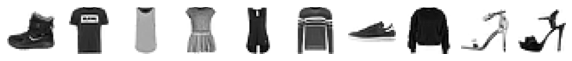

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

- 10개 데이터의 클래스 확인해보기

In [12]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]



- 각 클래스의 출력 개수를 확인해보자.

In [14]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

- 4차원 -> 1차원 변환

In [15]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

- 데이터의 개수는 총 6만개!

In [16]:
print(train_scaled.shape)

(60000, 784)


In [19]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 'log' = 경사하강법 사용
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

# 82%의 정확도!
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


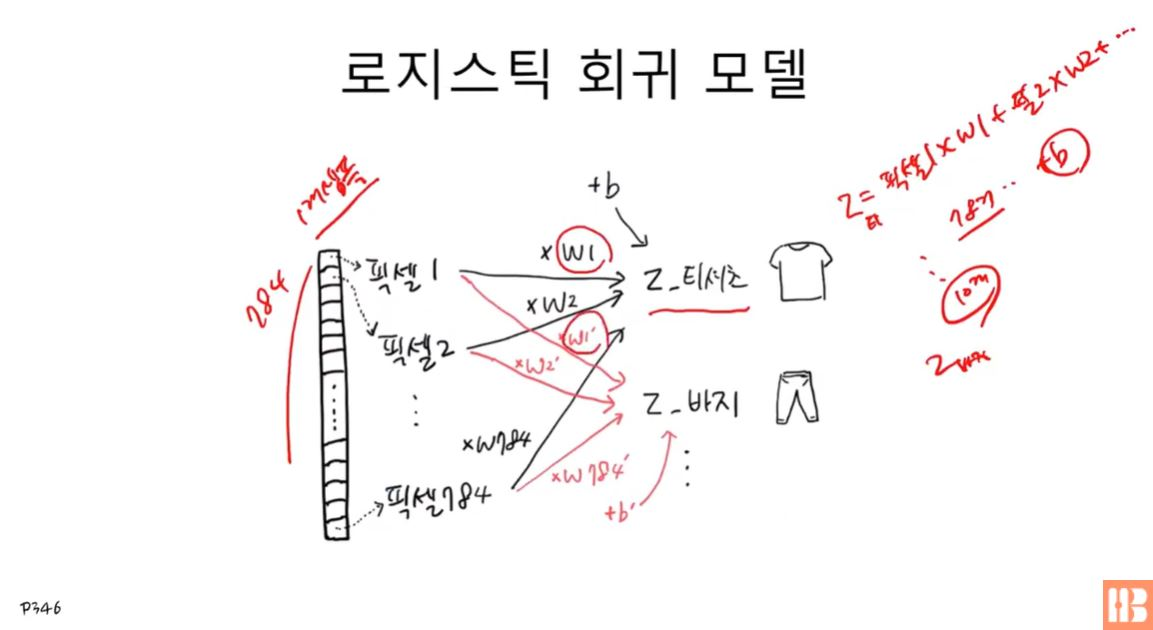

- 전체 784개 픽셀에 각각의 가중치를 더해 10개의 z 값을 얻는다.
- 즉 각각의 클래스에 대해 픽셀은 다른 가중치를 가진다.


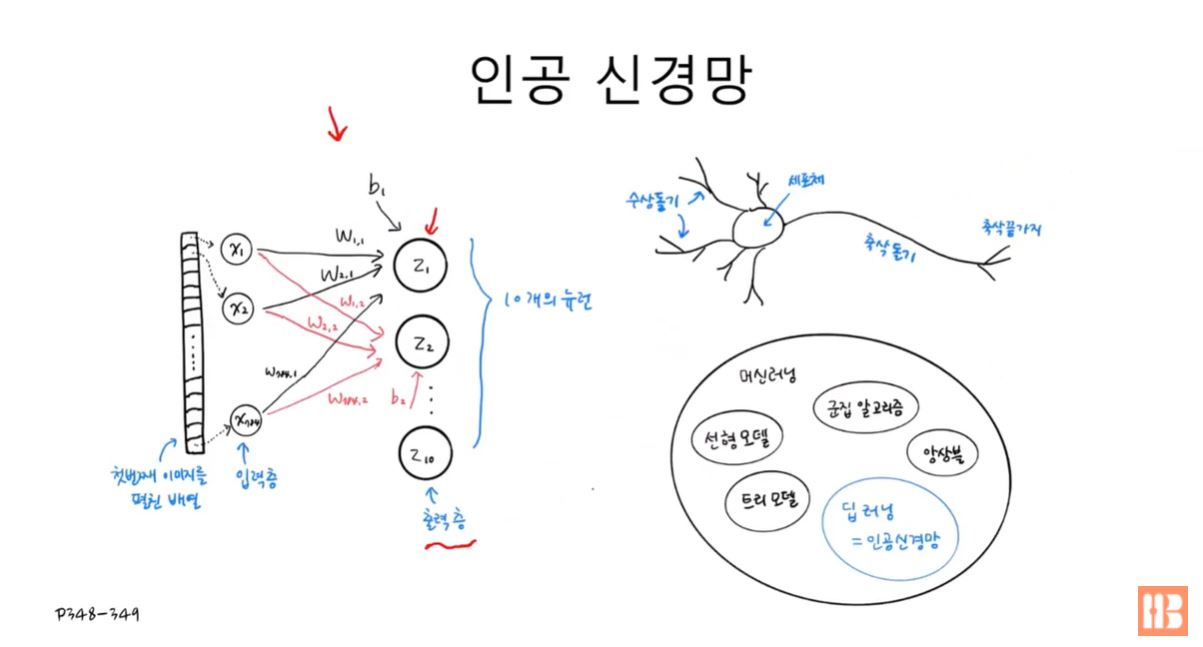

- 로지스틱 회귀 모델을 인공 신경망과 동일하게 볼 수 있다.
- 보통 인경 신경망은 z 값의 출력 층이 여러 개 존재한다. (위 사진은 가장 간단한 예시)

## 인공신경망

### 텐서플로와 케라스

In [21]:
import tensorflow as tf
from tensorflow import keras

## 인공신경망으로 모델 만들기

In [29]:
from sklearn.model_selection import train_test_split

# 딥러닝은 데이터 검증이 안정되어 있음
# 20%만 테스트 데이터셋으로 사용
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)

(15728, 784) (15728,)


In [30]:
print(val_scaled.shape, val_target.shape)

(3932, 784) (3932,)


In [25]:
# 10개의 출력층, 활성 함수 = 소프트맥스, input_shape = 샘플의 크기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

# Sequential 메소드로 모델 생성
model = keras.Sequential(dense)

* 모든 입력층이 모든 출력층과 연결되어 있는 경우 -> 밀집층 = 완전연결층

## 인공신경망으로 패션 아이템 분류하기
- `compile()` : 손실함수(loss)와 추가적인 평가 지표(metrics)를 설정할 수 있음
- `sparse` : 0과 1의 정수값이 아닌 0~9사이의 클래스 값을 출력할 수 있음

In [31]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

print(train_target[:10])

[8 9 4 9 6 3 6 8 2 1]


In [32]:
# epoch 설정 -> loss는 점점 감소, 정확도는 점점 증가
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
492/492 [==============================] - 3s 3ms/step - loss: 0.7581 - accuracy: 0.7399
Epoch 2/5
492/492 [==============================] - 1s 2ms/step - loss: 0.5439 - accuracy: 0.8138
Epoch 3/5
492/492 [==============================] - 1s 2ms/step - loss: 0.4987 - accuracy: 0.8304
Epoch 4/5
492/492 [==============================] - 1s 2ms/step - loss: 0.4772 - accuracy: 0.8367
Epoch 5/5
492/492 [==============================] - 1s 2ms/step - loss: 0.4619 - accuracy: 0.8444


In [33]:
# 83%의 검증도
model.evaluate(val_scaled, val_target)

123/123 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8311


[0.4884907305240631, 0.8311291933059692]